# Mel Schwan, Stuart Miller, Justin Howard, Paul Adams
# Lab Three: Clustering, Association Rules, or Recommenders
## Capstone: Association Rule Mining, Clustering, or Collaborative Filtering

### Lab3 Project Requirments -
1. [Business understanding](#Businessunderstanding)
    1. [Describe the purpose of the data set you selected](#Assessthecurrentsituation)
    2. [Describe how you would define and measure the outcomes from the dataset](#CostBenefit)
    3. [How would you measure the effectiveness of a good prediction algorithm](#Desiredoutputs)
    4. [Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?](#ValMethod)
  
2. [Data Understanding](#Dataunderstanding)
    1. [Describe the meaning and type of data for each attribute in the data file](#Describedata)
    2. [Verify data quality: Explain any missing values, duplicate data, and outliers](#Datareport)
    3. [Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean](#Stats)
    4. [Visualize the most important attributes appropriately (at least 5 attributes)](#Visualize)
    5. [Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate](#Correlations)
    6. [Identify and explain interesting relationships between features and the class you are trying to predict](#relationships)
    7. [Are there other features that could be added to the data or created from existing features? Which ones?](#Featurecreation)
    8. [Outlier Removal](#OutlierRemoval)
3. [Modeling and Evaluation](#Model)
    1. [Option A: Cluster Analysis](#Cluster)
    2. [Option B: Association Rule Mining](#Rule_mining)
    2. [Option C: Collaborative Filtering](#Collaborative)
4. [Deployment](#Deployment)
    1. [How useful is your model for interested parties? ](#Useful)
    2. [How would you measure the model's value if it was used by these parties?](#Value)
    3. [How would your deploy your model for interested parties?](#Deploy)
    4. [How often would your model need to be updated?](#Update)
    5. [What other data should be collected? ](#Collect)

A1. [Model Hyperparameter Tuning Details](#A2)


Our project will follow a hybrid methodology, mixing the expectations of the grading rubric with the CRISP_DM framework. CRISP-DM stands for the cross-industry process for data mining, which provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

In the final assignment for this course, you will be using one of three different analysis methods:
* Option A: Use transaction data for mining associations rules
* Option B: Use clustering on an unlabeled dataset to provide insight or features
* Option C: Use collaborative filtering to build a custom recommendation system
Your choice of dataset will largely determine the task that you are trying to achieve. Though the
dataset does not need to change from your previous tasks. For example, you might choose to use
clustering on your data as a preprocessing step that extracts different features. Then you can use
those features to build a classifier and analyze its performance in terms of accuracy (precision,
recall) and speed. Alternatively, you might choose a completely different dataset and perform rule
mining or build a recommendation system.

<img src="../_images/crisps-dm.png" style="width:550px;height:450px"/>


# 1. Stage One - Business understanding  <a class="anchor" id="Businessunderstanding"></a>


## 1.1 Describe the purpose of the data set you selected (Q1A)<a class="anchor" id="Assessthecurrentsituation"></a>

We have elected to use the Home Credit Default Risk dataset from Kaggle to conduct the analyses in Lab 3. The purpose of the dataset is to better understand and predict the leading indicators of loan defaults using 327 attributes that describe the financial characteristics of the given applicants.

We believe that the size of the dataset and the variety among its datatypes make it an effective dataset for clustering, association rule mining, and collaberative filtering.

### 1.1.2. Measuring the effectiveness of a good algorithm- <a class="anchor" id="Requirements"></a> 
#### 1. Effective Clustering Metric: Cluster Validity

The dataset contains 326 attributes for 307,511 loan applicants. An algorithm that clusters the dataset with a high degree of cluster validity will be difficult to obtain due to the high space-time complexity of clustering algorithms at our disposal. To reduce the space-time complexity of the dataset, we have elected to perform K-Means clustering on the first two principal components.

- **Business success criteria**

- **Data mining success criteria**

#### 2. Effective Association Rule Determination

- **Business success criteria**

- **Data mining success criteria**

#### 3. Effective Collaborative Filtering

- **Business success criteria**

- **Data mining success criteria**

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Describe the meaning and type of data for each attribute in the data file (Q2A) <a class="anchor" id="Describedata"></a>

Our data comes from the 
Our analysis features the use of several Python libraries, such as Pandas, in addition to a custom data cleaning script foinfo

In [9]:
import numpy as np
import pandas as pd
import pickle

from project_code.cleaning import read_clean_data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [12]:
## Loading data
def load_all():
    file = 'X_pca.sav'
    std_df = pd.read_csv('std_df.csv')
    y = pd.read_csv('y.csv')
    X_pca = pickle.load(open(file, 'rb'))
    return std_df, y, X_pca
std_df, y, X_pca = load_all()

In [26]:
y.head()

,TARGET
0,1
1,0
2,0
3,0
4,0


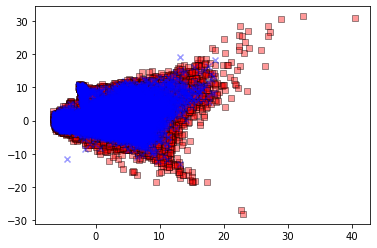

In [27]:
for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X_pca[y.TARGET== cl, 0],
                    y = X_pca[y.TARGET== cl, 1],
                    alpha = .4,
                    color = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label =cl)

## 2.2 Verify data quality: Explain any missing values, duplicate data, and outliers (Q2B) <a class="anchor" id="Datareport"></a>



## 2.3 Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean (Q2C) <a class="anchor" id="Stats"></a>



#### Data Cleaning Script

All the cleaning discussed in the sections above are implemented in `cleaning.py`.
This script contains a function (`read_clean_data`) to apply the cleaning steps and return the cleaned dataset for work.

**Details**  
* Cleaning
  * Read csv with Pandas (setting correct data types)
  * Drop columns that will not be used
  * Recode NA values that are not listed as np.nan
  * Formattings
  * Encode categorical variables
* Returns
  * DataFrame with cleaned data


## 2.4 Visualize the most important attributes appropriately (Q2D) <a class="anchor" id="Visualize"></a>

info

-


### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

This part of the exploration focused on the use of box plots and histograms for visualing continuous variables and bar charts for visualizing categorical variables. These graphical formats permit the easy identification of skewedness and help us identify outliers. 

Variables we expect to be important were selected for univariate visualization, such as `AMT_INCOME_TOTAL` and `AMT_ANNUITY`. The histogram shows the features of the main distribution, while the behavior of the tails and extreme values are shown in the boxplots. The distribution of incomes is extremely long-tailed and right-skewed, as can be expected with most any income distribution. 

Boxplots indicate a large number of outliers in both the `AMT_TOTAL_INCOME` and `AMT_ANNUITY` feature and one extreme outlier that will require closer exmaination. A comparison of each distribution in its raw and transformed form is displayed below.

## 2.5 Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate (Q2E) <a class="anchor" id="Correlations"></a>


info

## 2.6 Identify and explain interesting relationships between features and the class you are trying to predict (Q2F) <a class="anchor" id="relationships"></a>

infor

## 2.7 Are there other features that could be added to the data or created from existing features (Q2G) <a class="anchor" id="Featurecreation"></a>
Info

# 3. Stage  Three - Modeling and Evaluation <a class="anchor" id="Model"></a>

## 3.1 Option A: Cluster Analysis (Q3A)<a class="anchor" id="Cluster"></a>

**Clustering using K-Means**

A dataset with 307,511 records restricts the tools we can use to arrive at useful clusters of data without losing very large numbers of data. We elected to use the K-Means method using the first two principal component values for each record to drastically reduce the dimensionality of the dataset and minimize the information that is lost in the process.

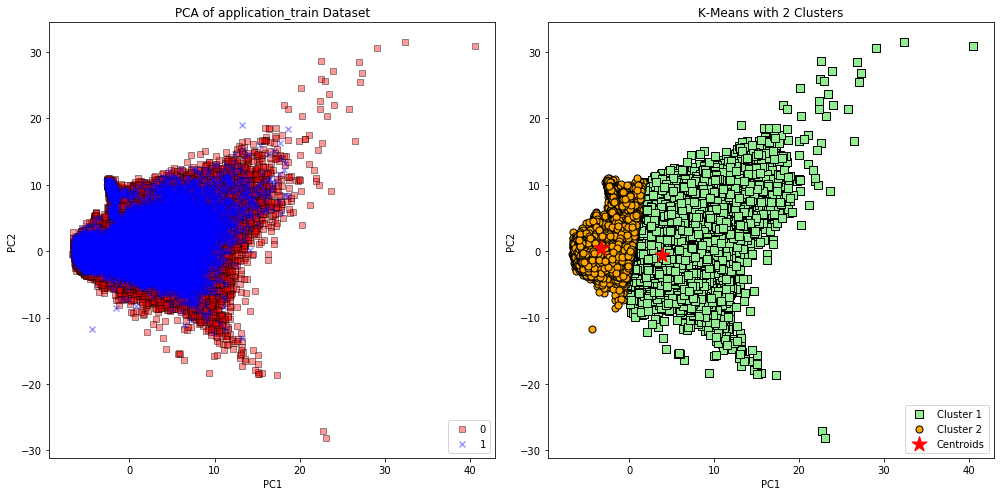

In [28]:
# conducting a 2 cluster KMeans operation to create benchmark visualization
km = KMeans(n_clusters = 2,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = .0001,
           random_state = 1)
y_km = km.fit_predict(X_pca)

markers = ('s','x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X_pca[y.TARGET== cl, 0],
                    y = X_pca[y.TARGET== cl, 1],
                    alpha = .4,
                    color = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label =cl)
plt.title('PCA of application_train Dataset')
plt.legend(scatterpoints = 1, loc = 'lower right')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(1,2,2)
plt.scatter(X_pca[y_km == 0, 0],
           X_pca[y_km == 0 , 1],
           s = 50, c = 'lightgreen',
           marker = 's', edgecolor = 'black', 
           label = 'Cluster 1')

plt.scatter(X_pca[y_km == 1, 0],
           X_pca[y_km == 1, 1],
           s = 50, c = 'orange',
           marker = 'o', edgecolor = 'black', 
           label = 'Cluster 2')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
            c = 'red',
           label = 'Centroids')
plt.legend(scatterpoints = 1, loc = 'lower right')
plt.title('K-Means with 2 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

**Significant Findings**

It was clear from the initial K-Means clustering, that a more ideal number of clusters is available, so an elbow plot was created by using the between_cluster sum of squared errors for a range of clusters from 1 - 12 - 

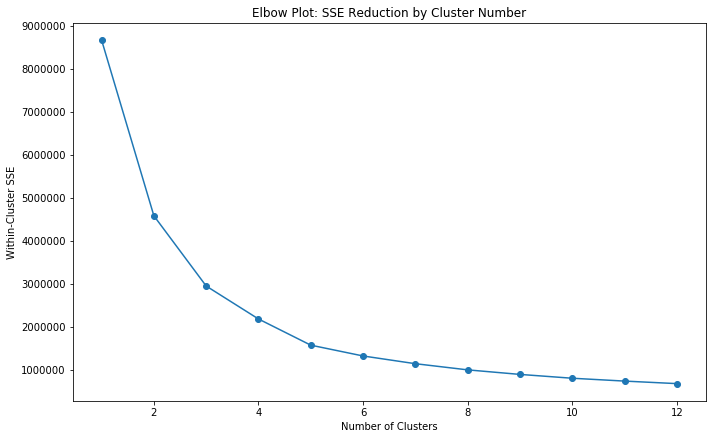

In [29]:
SSEs = []

for i in range(1,13):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init= 10,
               max_iter= 300,
               random_state = 1)
    km.fit(X_pca)
    SSEs.append(km.inertia_)


   
plt.figure(figsize = (10,6))
plt.plot(range(1,13), SSEs, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster SSE')
plt.tight_layout()
plt.title('Elbow Plot: SSE Reduction by Cluster Number')
plt.show()

** Significant Findings**

We elect to describe the data using 5 clusters to create new features to help describe the clusters of applicants. To begin our decription of the 5 chosen clusters, we will first visualize the clusters. 

In [30]:
km = KMeans(n_clusters = 5,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = .0001,
           random_state = 1)
y_km = km.fit_predict(X_pca)

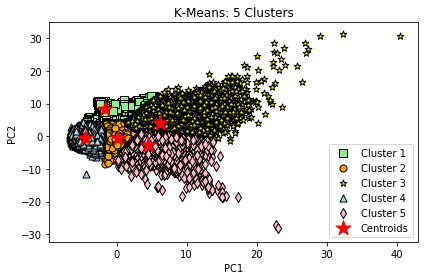

In [31]:
plt.scatter(X_pca[y_km == 0, 0],
           X_pca[y_km == 0 , 1],
           s = 50, c = 'lightgreen',
           marker = 's', edgecolor = 'black', 
           label = 'Cluster 1')

plt.scatter(X_pca[y_km == 1, 0],
           X_pca[y_km == 1, 1],
           s = 50, c = 'orange',
           marker = 'o', edgecolor = 'black', 
           label = 'Cluster 2')

plt.scatter(X_pca[y_km == 2, 0],
           X_pca[y_km == 2, 1],
           s = 50, c = 'yellow',
           marker = '*', edgecolor = 'black', 
           label = 'Cluster 3') 
plt.scatter(X_pca[y_km == 3, 0],
           X_pca[y_km == 3, 1],
           s = 50, c = 'lightblue',
           marker = '^', edgecolor = 'black', 
           label = 'Cluster 4') 
plt.scatter(X_pca[y_km == 4, 0],
           X_pca[y_km == 4, 1],
           s = 50, c = 'pink',
           marker = 'd', edgecolor = 'black', 
           label = 'Cluster 5') 
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
            c = 'red',
           label = 'Centroids')

plt.legend(scatterpoints = 1, loc = 'lower right')
plt.title('K-Means: 5 Clusters')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

In [32]:
c_1 = np.array([n for n  in y_km if n == 0])
c_2 = np.array([n for n  in y_km if n == 1])
c_3 = np.array([n for n  in y_km if n == 2])
c_4 = np.array([n for n  in y_km if n == 3])
c_5 = np.array([n for n  in y_km if n == 4])

print(c_1.shape,
      c_2.shape,
      c_3.shape,
      c_4.shape,
      c_5.shape)

(18509,) (86976,) (30429,) (104961,) (66636,)


For n_clusters = 2 The average silhouette_score is : 0.45415935754971315
For n_clusters = 3 The average silhouette_score is : 0.49724278182233317
For n_clusters = 4 The average silhouette_score is : 0.4976591504198651
For n_clusters = 5 The average silhouette_score is : 0.46867469682826035
For n_clusters = 6 The average silhouette_score is : 0.4622295693199857
For n_clusters = 7 The average silhouette_score is : 0.4311092923594805


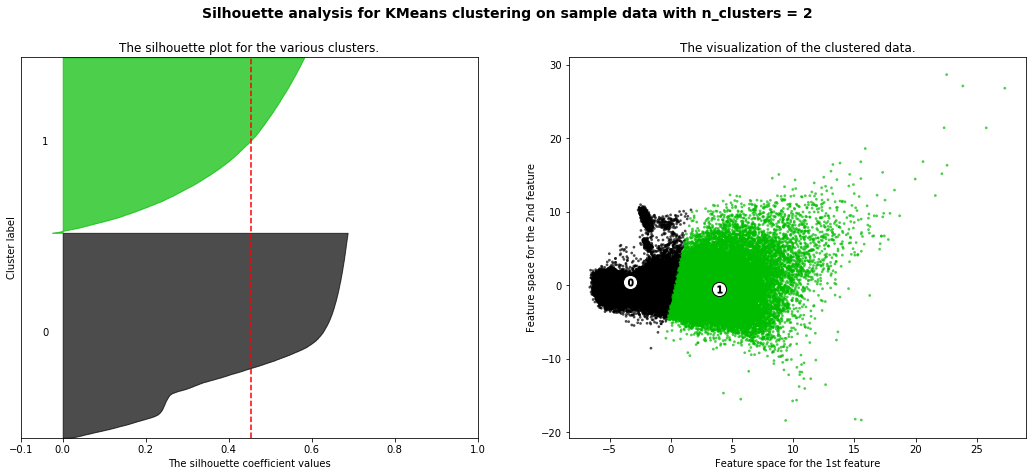

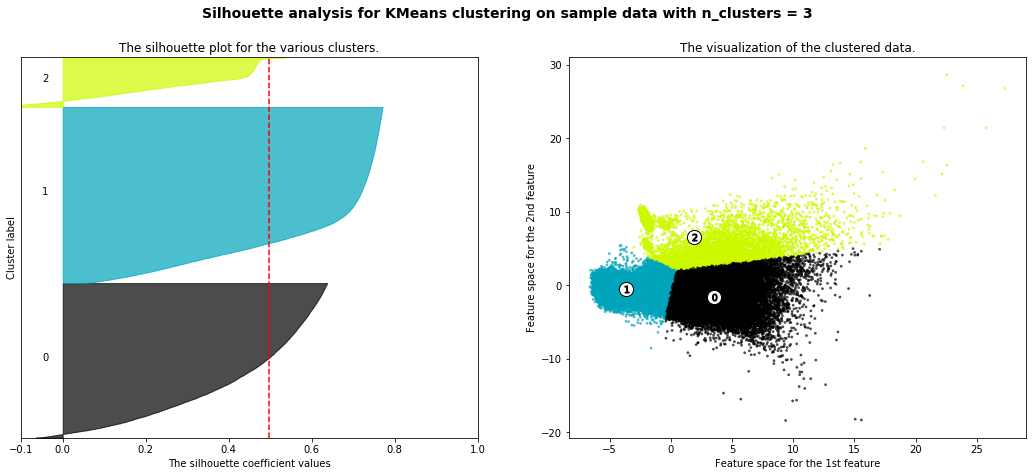

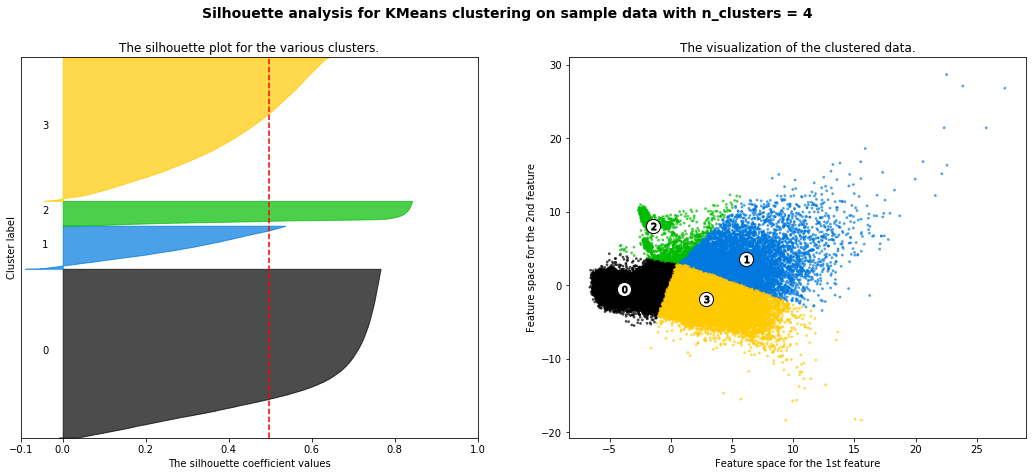

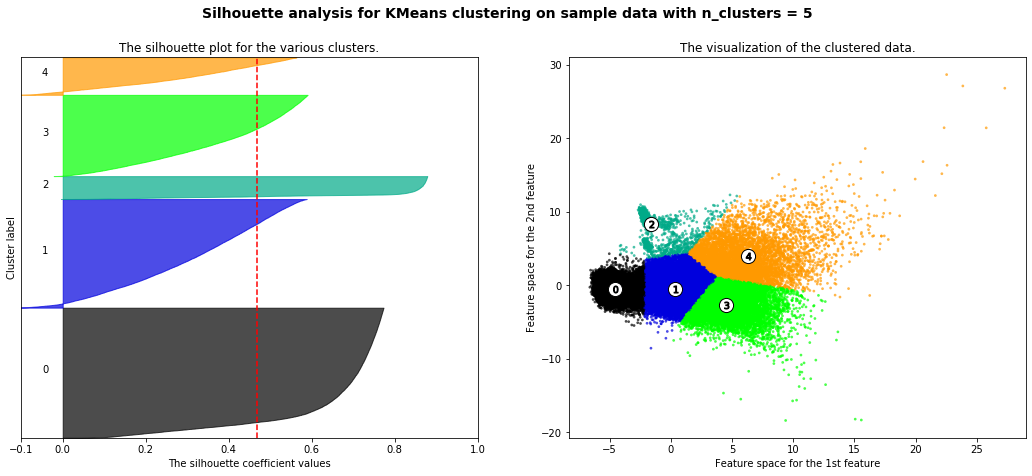

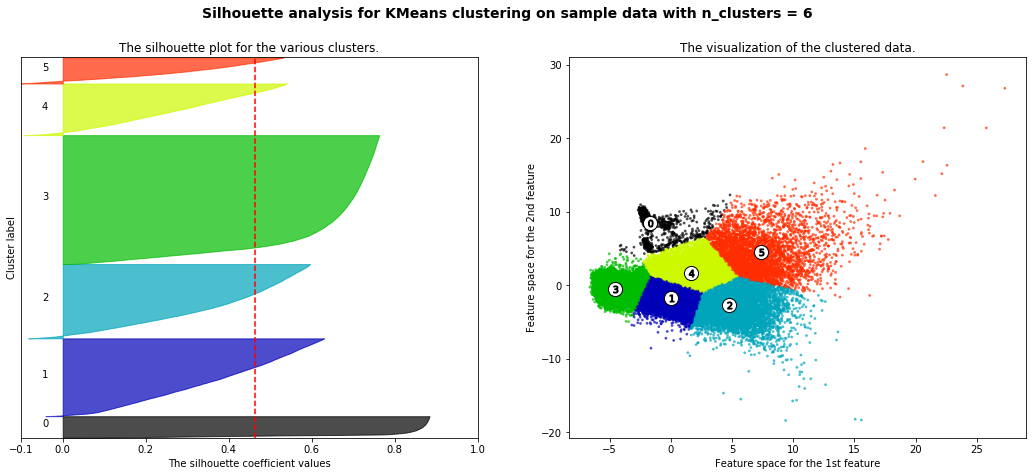

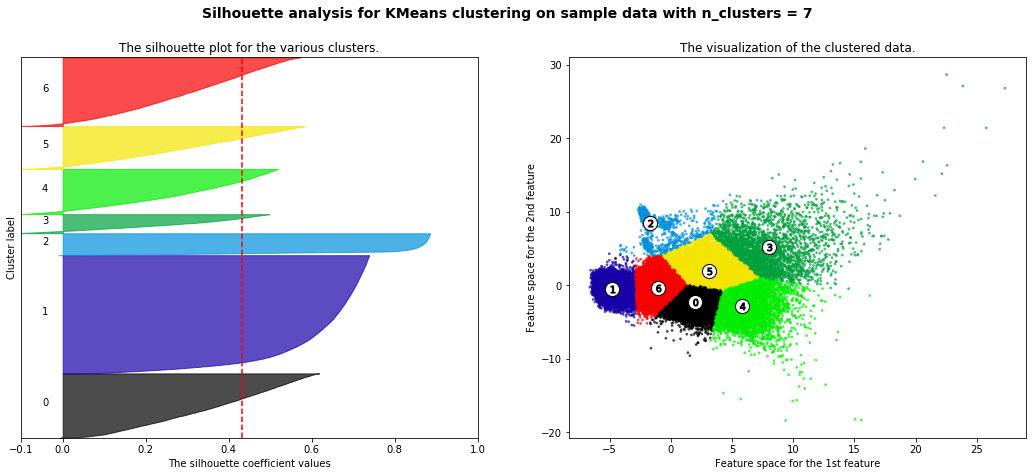

In [33]:
#reducing dataset size to 20% to reduce the computational time of silhouette sampling
tiny_pca = pd.DataFrame(X_pca)
tiny_pca = tiny_pca.sample(frac= 0.2, replace = False, random_state=1)


range_n_clusters = [2,3,4,5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tiny_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1, n_jobs = -1)
    cluster_labels = clusterer.fit_predict(tiny_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tiny_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tiny_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tiny_pca.iloc[:, 0], tiny_pca.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

** Significant Findings **

We see that our 5 clusters vary in their density and magnitude. These clusters were formed based on the Euclidean Distance of the first two Principal Components of the standardized dataset. This makes it nearly impossible to interpret the characteristics of the 5 clusters we have identified. 
To clarify what makes these clusters different, we can add a cluster feature to the raw dataset and conducting a Linear Discriminate Analysis (LDA). Since this analysis is purely descriptive, a finely tuned model is not deemed necessary. 

To stay aligned with the assumptions of LDA, log transformations will be applied to all predictor variables, excluding the `EXT_SOURCE` variables and the binary indicator variables. We chose to exclude the `EXT_SOURCE` variables from trnasformations because they are already transformed.

## 3.2 Option B: Association Rule Mining (Q3B)<a class="anchor" id="Rule_mining"></a>

Info

## 3.3 Option C: Collaborative Filtering (Q3C)<a class="anchor" id="Collaborative"></a>

Info

# 4. Stage Five - Deployment (Q3) <a class="anchor" id="Deployment"></a>

## 4.1 Next Stage Deployment <a class="anchor" id="Deployment"></a>

The next stage in the CRISP-DM is deployment. After model building and evaluation, we are ready to deploy our code representation of the model into a production environment and solve our original business problem.
Our business problem is to give Home Credit loan evaluators access to a model that evaluates an applicant’s current and past financial history in determining whether to approve the requested loan.

#### How useful is your model for interested parties?<a class="anchor" id="Useful"></a>

We believe this model would be useful for loan departments loan evaluators. This is contingent of discovering how some of the external variables are created. With this and some additional consistancy in top scoring features we could improve the accuracy

#### How would you measure the model's value if it was used by these parties?<a class="anchor" id="Value"></a>

This model should be tested in parrellel to present evaluation proceess. Then after a set period of time compare human evaluation to model based accuracy. If the results were the same, the minimum resulting savings would be the salaries of the loan evaluators. Added value would result from the acceleration of the loan approval process.

#### How would your deploy your model for interested parties?<a class="anchor" id="Deploy"></a>

Depending on the resources,  available, models can be deployed as batch or real-time predictions. Home Credits current process is a batch implementation. The applicant fills out the form which is then digitized and sent to the loan approval department. During the loan approval, the collected data will need to be cleaned and normalized before processed through the machine learning predictive model.

#### How often would the model need to be updated?<a class="anchor" id="Update"></a>

The metrics for the customer is continually updated. On a scheduled cycle, this new dataset is analyzed through the current model. Doing batch cycles will allow for consistency in whether an applicant is approved or not.  However, model designs will change as newer technology are available or changing business environments make reengineering required.

#### What other data should be collected?<a class="anchor" id="Collect"></a>

In addition to the clarification of data we have described above, there would be a tremendous value in the financials for the industry that the individual is working. These financials could assist in prediction of any future concerns for the applicants present income.

Below is a typical example of a batch deployment \[1\].

<img src="../_images/batchdeployment_process.png" style="width:800px;height:375px"/>



## References

\[1\] J. Kervizic, Overview of Different Approaches to Deploying Machine Learning Models in Production, June 2016.
Accessed on: Feb. 15, 2019. \[Online\].
Available: https://www.kdnuggets.com/2019/06/approaches-deploying-machine-learning-production.html

# A1. Parameter Tuning <a class="anchor" id="A2"></a>

The code and output of model tuneing in shown below.